In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

import geopandas
from shapely.geometry import Point, Polygon, MultiPoint

In [2]:
pd.options.display.max_columns=100

In [3]:
df=pd.read_csv('subway.csv')
df=df[['name','street_address','city','state','zip_code','country','latitude','longitude']]

# PLOTING USA STATES 

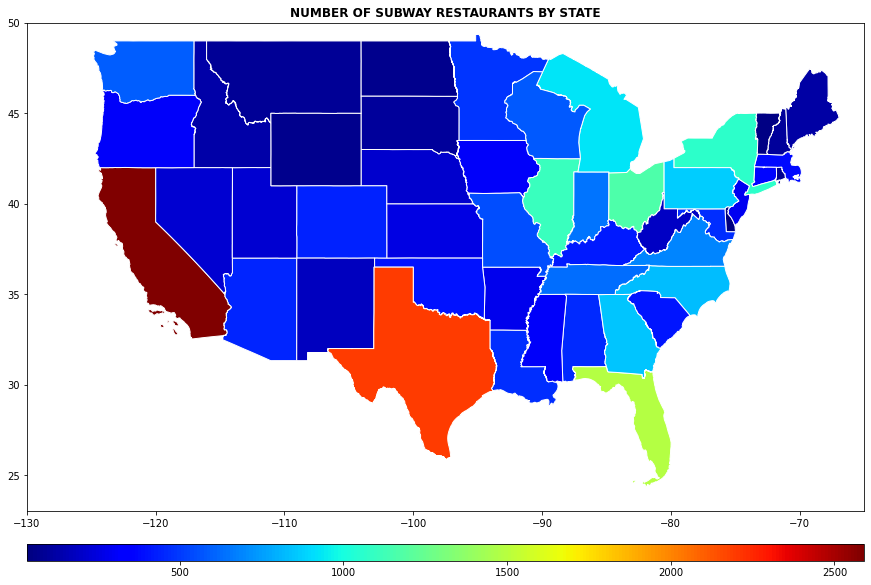

In [4]:
states=geopandas.read_file('us-state-boundaries.shp')
grouped=df.groupby('state')['state'].count().reset_index(name='count')
grouped=grouped.merge(states[['stusab','geometry']],left_on='state',right_on='stusab')
grouped=geopandas.GeoDataFrame(grouped)

fig,ax=plt.subplots(1,1,figsize=(15,12))
grouped.plot(ax=ax,ec='white',column='count',legend=True,cmap='jet',
                                              legend_kwds={'orientation':'horizontal','pad':0.05,'aspect':50}
                                              )
plt.title('NUMBER OF SUBWAY RESTAURANTS BY STATE',fontweight='bold')
plt.ylim(23,50)
plt.xlim(-130,-65)
plt.show()

# PLOTING ZIP CODES 

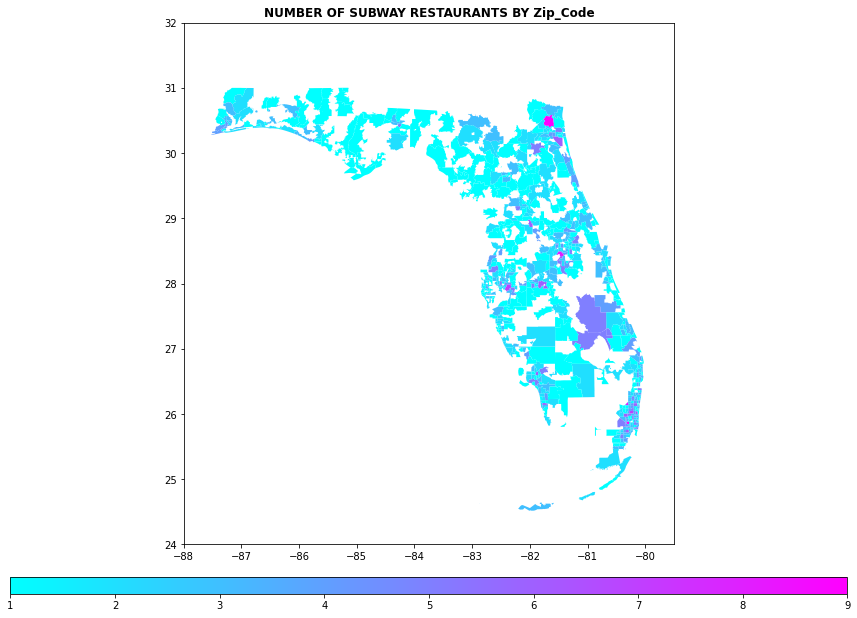

In [5]:
zips=geopandas.read_file(r'C:\Users\berid\python სავარჯიშოები\tl_2019_us_zcta510\tl_2019_us_zcta510.shp')
grouped=df.groupby(['zip_code','state'])['zip_code'].count().reset_index(name='count')
grouped=grouped.merge(zips[['GEOID10','geometry']],left_on='zip_code',right_on='GEOID10')
grouped=geopandas.GeoDataFrame(grouped)

fig,ax=plt.subplots(1,1,figsize=(15,12))
grouped.query('state=="FL"').plot(ax=ax,column='count',cmap='cool',legend=True,legend_kwds={'orientation':'horizontal','pad':0.05,'aspect':50})

plt.title('NUMBER OF SUBWAY RESTAURANTS BY Zip_Code',fontweight='bold')
plt.ylim(24,32)
plt.xlim(-88,-79.5)
plt.show()

# PLOTING GEORGIA 

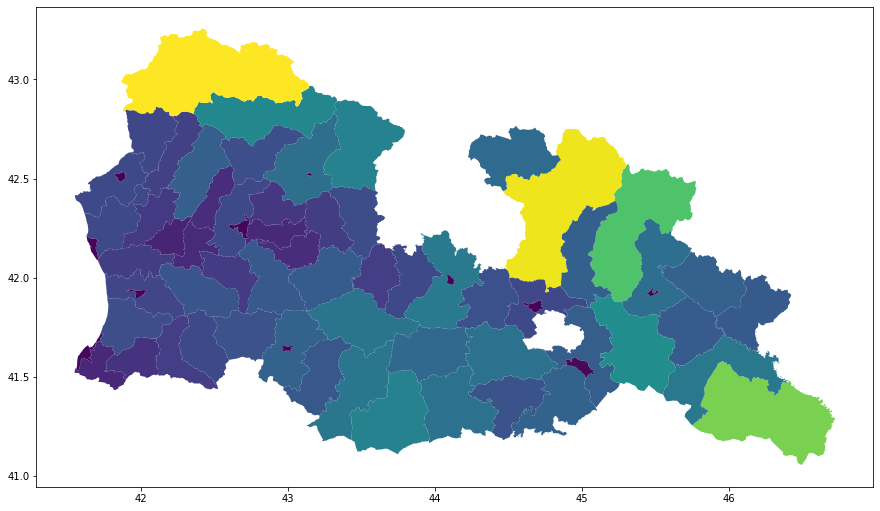

In [6]:
geo=geopandas.read_file(r'C:\Users\berid\python სავარჯიშოები\geo_adm_geostat_20191018_shp\geo_admbnda_adm2_geostat_20191018.shp')

fig,ax=plt.subplots(figsize=(15,10))
geo.plot(ax=ax,column='Shape_Area',cmap='viridis')
plt.show()